In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df1 = pd.read_csv('/content/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df1.shape

(13320, 9)

In [ ]:
df1['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
# we are assuming that the final price does not defend on features like area_type,balcony,society and availability
df1 = df1.drop(['area_type','availability','balcony','society'],axis='columns')
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [ ]:
df1.isna().sum()

,0
location,1
size,16
total_sqft,0
bath,73
price,0


In [ ]:
df1 = df1.dropna()
df1.isna().sum()

,0
location,0
size,0
total_sqft,0
bath,0
price,0


In [ ]:
 df1['size'].unique()
 # or df1['size'].value_counts()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df1['bhk'] = df1['size'].apply(lambda x : int(x.split(' ')[0]))

In [ ]:
df1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df2 = df1.drop('size',axis='columns')
df2.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [ ]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [ ]:
df2[~df2['total_sqft'].apply(is_float)]

,location,total_sqft,bath,price,bhk
30,Yelahanka,2100 - 2850,4.0,186.000,4
122,Hebbal,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,43.490,2
188,KR Puram,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2
12990,Talaghattapura,1804 - 2273,3.0,122.000,3
13059,Harlur,1200 - 1470,2.0,72.760,2
13265,Hoodi,1133 - 1384,2.0,59.135,2


In [ ]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens) == 2:
    return (float(tokens[0]) + float(tokens[1]))/2  # for range values eg.2345-3245
  try:
    return float(x)                          # for normal values eg.2354, 4567 etc
  except:
    return None                               # rest all is taken as null values eg.2546sqft etc

In [ ]:
convert_sqft_to_num('2345')   # testing the function

2345.0

In [ ]:
convert_sqft_to_num('2345-3456')

2900.5

In [ ]:
df4 = df2.copy()   #deep copy
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)  # can also use lambda funct.

In [ ]:
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [ ]:
df5 = df4.copy()
df5['price_per_sqft'] = (df5['price']*100000) / df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [ ]:
len(df5.location.unique())

1304

In [ ]:
df5['location'] = df5['location'].apply(lambda x : x.strip())
location_stats = df5.groupby('location')['location'].agg('count')
location_stats
# location_stats = df5.location.value_counts() , we can use this too its the same

,location
location,
1 Annasandrapalya,1
1 Giri Nagar,1
1 Immadihalli,1
1 Ramamurthy Nagar,1
12th cross srinivas nagar banshankari 3rd stage,1
...,...
t.c palya,1
tc.palya,4
vinayakanagar,1


In [ ]:
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

,location
location,
Whitefield,535
Sarjapur Road,392
Electronic City,304
Kanakpura Road,266
Thanisandra,236
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(location_stats[location_stats<=10])

1052

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

,location
location,
Kalkere,10
Sadashiva Nagar,10
BTM 1st Stage,10
Basapura,10
Gunjur Palya,10
...,...
poornaprajna layout,1
pavitra paradise,1
near Ramanashree California resort,1


In [ ]:
len(df5.location.unique())

1293

In [ ]:
#taking all locations less than 10 as 'other' category
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [ ]:
df5.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


# Outlier Detection

In [ ]:
df5[(df5.total_sqft/df5.bhk)<300]  # min of 300 sq will be there if you have 1 bedroom or more

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [ ]:
df6 = df5[~((df5.total_sqft/df5.bhk)<300)]   # removing all those less than 300
df6.shape

(12502, 6)

In [ ]:
df6.price_per_sqft.describe()

,price_per_sqft
count,12456.000000
mean,6308.502826
std,4168.127339
min,267.829813
25%,4210.526316
50%,5294.117647
75%,6916.666667
max,176470.588235


In [ ]:
#you can see min is 267 and the max is 176470 away from the ranges of mean and std. ideally should be between

def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [ ]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 6)

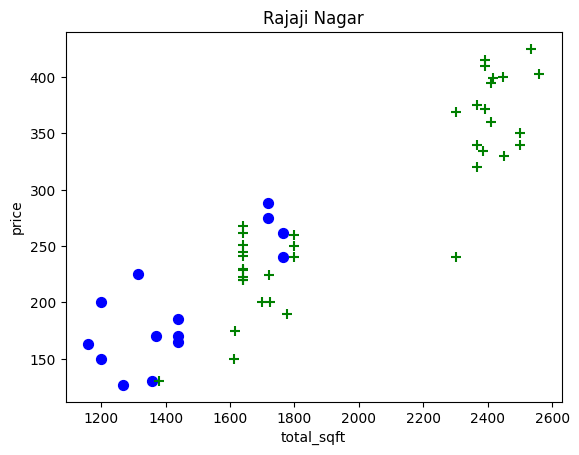

In [ ]:
# sometimes 2 bhk is having more price than 3 bhk in within the same loction

def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 bhk', s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 bhk', s=50)
  plt.xlabel('total_sqft')
  plt.ylabel('price')
  plt.title(location)

plot_scatter_chart(df7,'Rajaji Nagar')


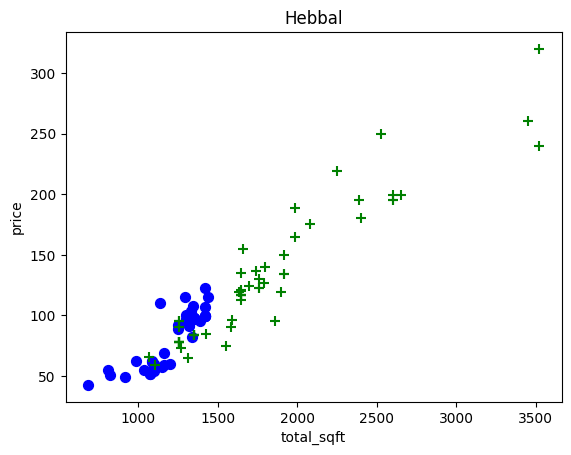

In [ ]:
plot_scatter_chart(df7,'Hebbal')

We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{

    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.price_per_sqft),
          'std': np.std(bhk_df.price_per_sqft),
          'count': bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')



In [ ]:
df8 = remove_bhk_outliers(df7)
df8.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,2450.0,4.0,368.0,4,15020.408163
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,5666.666667
10,1st Phase JP Nagar,2065.0,4.0,210.0,3,10169.491525


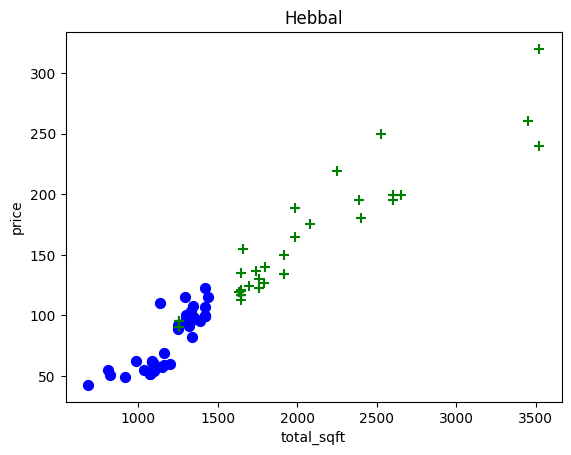

In [ ]:
plot_scatter_chart(df8,'Hebbal')

Text(0, 0.5, 'count')

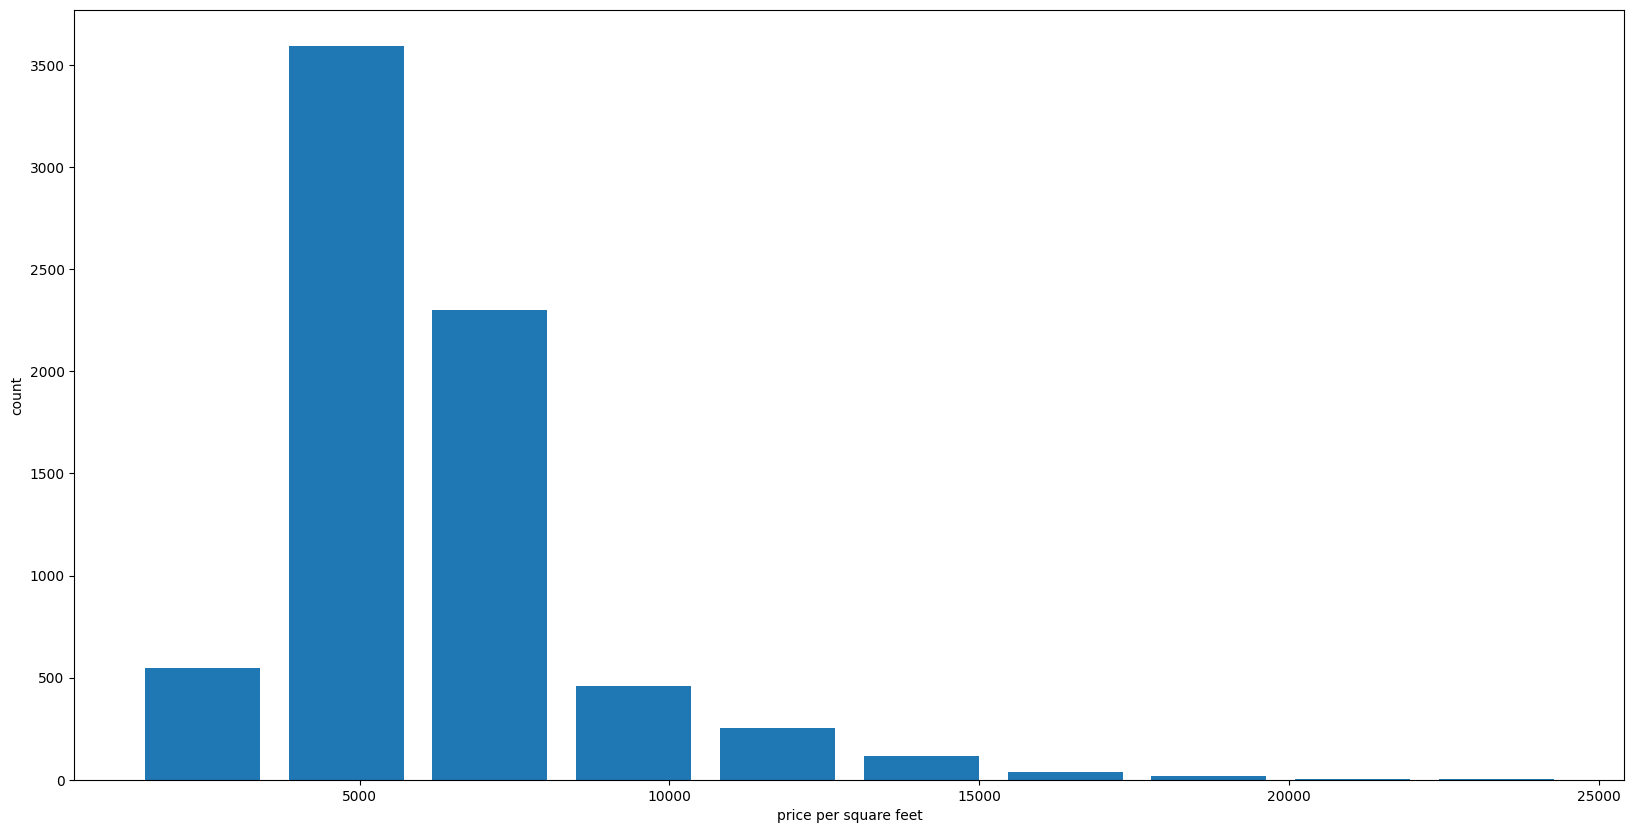

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')

In [ ]:
# this give us the count of properties(data points) in the price range. as you can see most are in the range of 0 to 10000

In [ ]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [ ]:
df8[df8.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

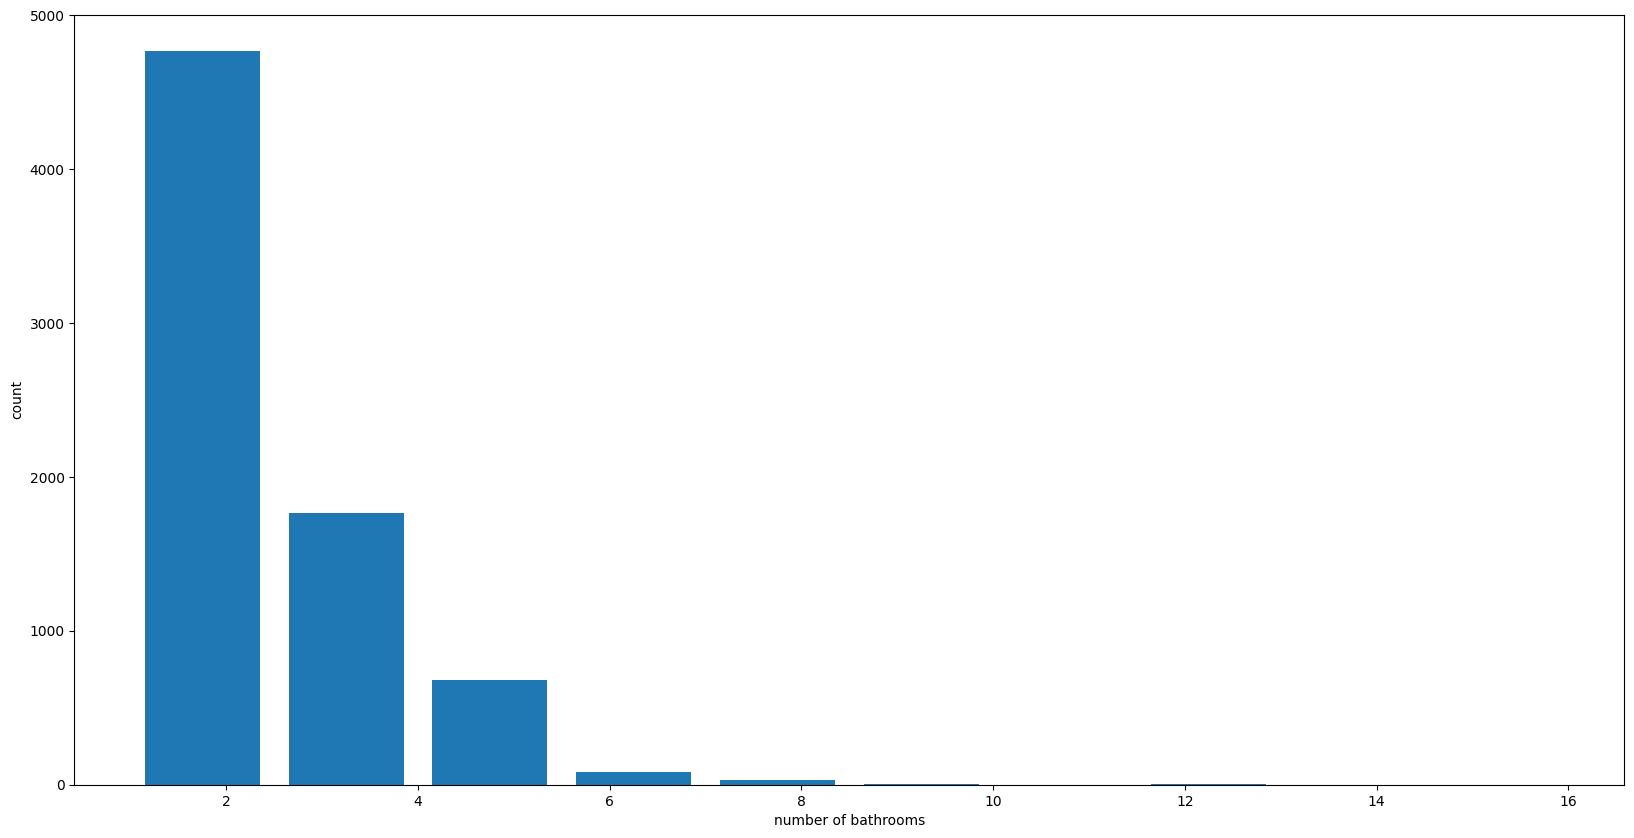

In [ ]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel('number of bathrooms')
plt.ylabel('count')

In [ ]:
# now manager says anytime you have bathrooms more than number of rooms + 2, it can be considered outlier

df8[df8.bath>df8.bhk+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8411,other,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df9 = df8[df8.bath<df8.bhk+2]
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [ ]:
# finally we drop unwanted features. we can drop price_per_sqft because it was only needed for outlier detection

In [ ]:
df9 = df9.drop('price_per_sqft',axis='columns')
df9.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [ ]:
dummies = pd.get_dummies(df9.location)
dummies = dummies.astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
dummies = dummies.drop('other',axis='columns')

In [ ]:
df10 = pd.concat([df9,dummies],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11 = df10.drop('location',axis='columns')
df11.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df11.shape

(7251, 245)

In [ ]:
X = df11.drop('price',axis='columns')
y = df11.price
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8452277697874329

In [ ]:
# shuffle split makes sure each fold has all types of data , not just one type
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
# here cv is a cross validation splitter object not an int
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [ ]:
def find_best_model_using_grid_search_cv(X,y):
  algos = {
      'linear_regression':{
          'model':LinearRegression(),
          'params':{
              #'normalize':[True,False]
              'fit_intercept':[True]
          }
      },
      'lasso':{
          'model':Lasso(),
          'params':{
              'alpha':[1,2],
              'selection':['random','cyclic']
          }
      },
      'decision_tree':{
          'model':DecisionTreeRegressor(),
          'params':{
              'criterion':['poisson','friedman_mse'],
              'splitter':['best','random']
          }
      }
  }
  scores = []

  cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
    gs.fit(X,y)
    scores.append(
        {
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        }
    )
  return pd.DataFrame(scores,columns=['model','best_score','best_params'])


find_best_model_using_grid_search_cv(X,y)


,model,best_score,best_params
0,linear_regression,0.818354,{'fit_intercept': True}
1,lasso,0.687429,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.727156,"{'criterion': 'poisson', 'splitter': 'best'}"


In [ ]:
# now we will use the linear_regression model itself (lr_model) as it showed the best results

In [ ]:
loc_index = np.where(X.columns=='Hebbal')[0][0]
loc_index

np.int64(99)

In [ ]:
loc_index = np.where(X.columns=='Hebbal')
loc_index

(array([99]),)

In [ ]:
def predict_price(location,sqft,bath,bhk):
  loc_index = np.where(X.columns==location)[0][0]

  x = np.zeros(len(X.columns))
  x[0]=sqft
  x[1]=bath
  x[2]=bhk
  if loc_index>0:
    x[loc_index] = 1

  return lr_model.predict([x])[0]


In [ ]:
predict_price('Hebbal',1000,2,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(71.2251965141243)

In [ ]:
predict_price('1st Phase JP Nagar',1000,3,3)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(86.80519395214823)

In [ ]:
predict_price('Indira Nagar',1000,2,2)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(181.27815484006715)

In [ ]:
import pickle
with open('Bangalore_home_prices.pickle','wb') as f:
  pickle.dump(lr_model,f)

In [ ]:
# 'wb' for model beacuse model is in binary format

In [ ]:
import json

columns = {
    'data_columns':[col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
  f.write(json.dumps(columns))